### **TASK-1: DATA-CLEANING**

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
emp_data=pd.read_csv("DS1_C9_S7_Project_AbsenteeismAtWork_Data_1.csv",sep=";")
emp_data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [4]:
emp_data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [5]:
emp_data.columns=emp_data.columns.str.replace(" ","_")
emp_data.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [6]:
emp_data

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


#### **Info about the columns**

In [8]:
#info about the columns
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason_for_absence               740 non-null    int64  
 2   Month_of_absence                 740 non-null    int64  
 3   Day_of_the_week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation_expense           740 non-null    int64  
 6   Distance_from_Residence_to_Work  740 non-null    int64  
 7   Service_time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work_load_Average/day_           740 non-null    float64
 10  Hit_target                       740 non-null    int64  
 11  Disciplinary_failure             740 non-null    int64  
 12  Education             

#### **Info about the null values**

In [10]:
emp_data.isnull().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

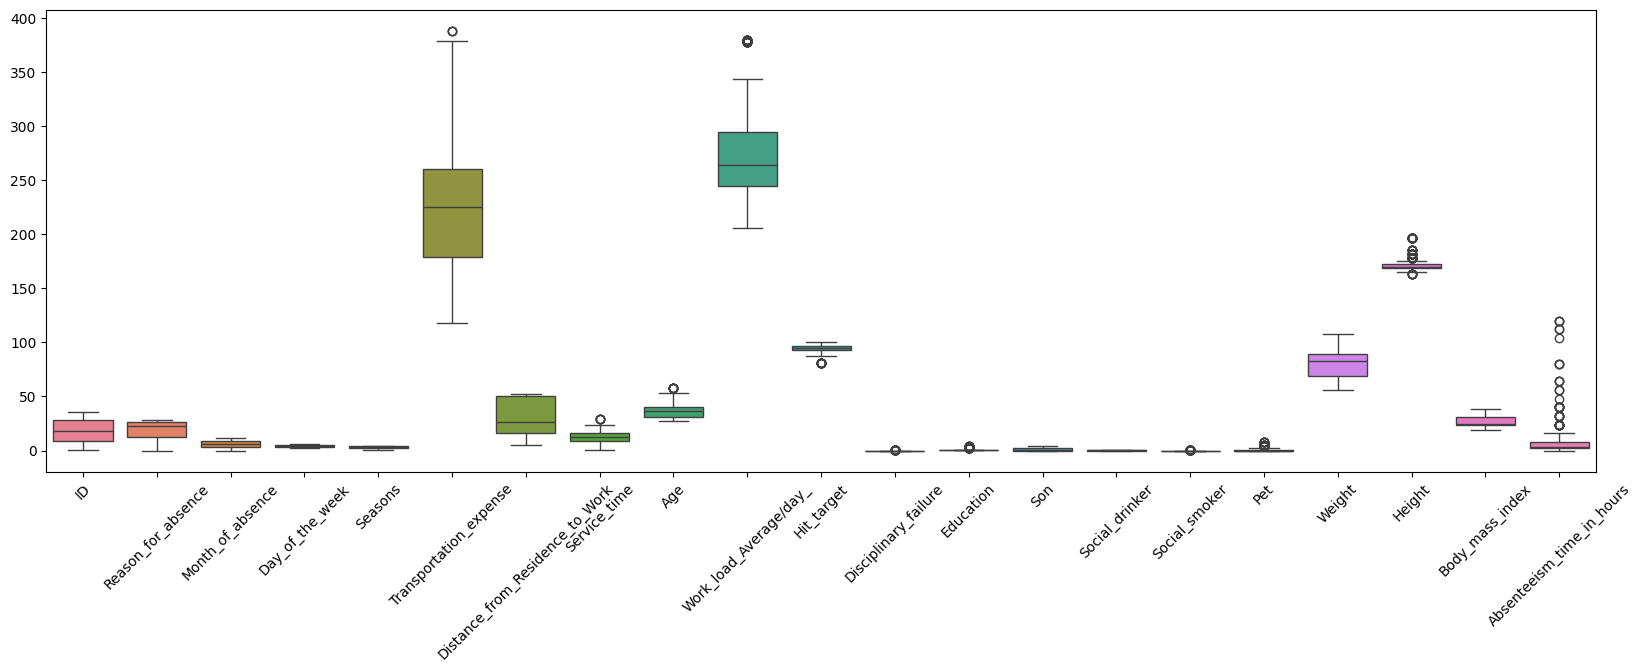

In [11]:
#Box Plot
sns.boxplot(data=emp_data)
plt.gcf().set_size_inches(20,6) #gcf(): get current figure size
plt.xticks(rotation=45)
plt.show()

### **TASK-2: UNDERSTANDING ABSENTEEISM PATTERNS**

#### **Binary categorical variables**

In [14]:
treated_df=emp_data

In [15]:
# Binary categorical variables
treated_df["Disciplinary_failure_c"] = treated_df["Disciplinary_failure"].map({0: "No Failure", 1: "Failure"})
treated_df["Social_Drinker_c"] = treated_df["Social_drinker"].map({0: "No", 1: "Yes"})
treated_df["Social_Smoker_c"] = treated_df["Social_smoker"].map({0: "No", 1: "Yes"})


In [16]:
print("Disciplinary_failure", treated_df["Disciplinary_failure"].unique())
print("Social_Drinker_c", treated_df["Social_Drinker_c"].unique())
print("Social_Smoker_c", treated_df["Social_Smoker_c"].unique())

Disciplinary_failure [0 1]
Social_Drinker_c ['Yes' 'No']
Social_Smoker_c ['No' 'Yes']


#### **Education**

In [18]:
treated_df["Education"].unique()

array([1, 3, 2, 4], dtype=int64)

In [19]:
# Defining bins and labels for different categories
education_bins = [0, 1, 2, 3, 4]  # Assuming education levels are 1, 2, 3, 4
education_labels = ["High School", "Graduate", "Post-Graduate", "Doctorate"]
treated_df["Education_c"] = pd.cut(treated_df["Education"], bins=education_bins, labels=education_labels)

print("Unique Education Categories:", treated_df["Education_c"].unique())

Unique Education Categories: ['High School', 'Post-Graduate', 'Graduate', 'Doctorate']
Categories (4, object): ['High School' < 'Graduate' < 'Post-Graduate' < 'Doctorate']


#### **Seasons**

In [21]:
treated_df["Seasons"].unique()

array([1, 4, 2, 3], dtype=int64)

In [22]:
season_bins = [0, 1, 2, 3, 4]  # Assuming 1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter
season_labels = ["Summer", "Fall", "Winter","Spring"]
treated_df["Seasons_c"] = pd.cut(treated_df["Seasons"], bins=season_bins, labels=season_labels)

print("Unique Season Categories:", treated_df["Seasons_c"].unique())

Unique Season Categories: ['Summer', 'Spring', 'Fall', 'Winter']
Categories (4, object): ['Summer' < 'Fall' < 'Winter' < 'Spring']


#### **Day_of_the_week**

In [24]:
treated_df["Day_of_the_week"].unique()

array([3, 4, 5, 6, 2], dtype=int64)

In [25]:
# Defining bins and labels
bins = [0, 1, 2, 3, 4, 5, 6, 7]
labels = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
treated_df["Day_of_the_week_c"] = pd.cut(treated_df["Day_of_the_week"], bins=bins, labels=labels)
treated_df["Day_of_the_week_c"].unique()

['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday']
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

#### **Month_of_absence**

In [27]:
treated_df["Month_of_absence"].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  0], dtype=int64)

In [28]:
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12]
labels = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
treated_df["Month_of_absence_c"] = pd.cut(treated_df["Month_of_absence"], bins=bins, labels=labels)
treated_df["Month_of_absence_c"].unique()

['July', 'August', 'September', 'October', 'November', ..., 'March', 'April', 'May', 'June', NaN]
Length: 13
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

#### **Reason_for_absence**

In [30]:
treated_df["Reason_for_absence"].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [31]:
absence_groups = {
    "Infectious & Immune System Diseases": [1, 3], 
    "Chronic & Metabolic Diseases": [2, 4], 
    "Mental Health & Neurological Conditions": [5, 6], 
    "Sensory Organ Disorders": [7, 8], 
    "Cardiovascular & Respiratory Conditions": [9, 10], 
    "Digestive & Gastrointestinal Disorders": [11], 
    "Skin & Musculoskeletal Conditions": [12, 13], 
    "Urinary & Reproductive System Conditions": [14, 15], 
    "Birth & Congenital Conditions": [16, 17], 
    "General Symptoms & Injury-Related Absences": [18, 19, 20], 
    "Preventive & Non-Disease-Related Absences": [21, 22, 23, 24, 25, 26, 27, 28]
}

In [32]:
threshold=[4,9,14,18,29]
labels=["Immune & chronic issues", "Neurological and sensory disorders", "Digestive and dermatological", "Urinary & Congenital","General and non-disease related absences"]
#function to assign labels based on conditions
def assign_label(values):
    if values<=threshold[0]: #returns index 0 i.e. (14)
        return labels[0]
    elif values<=threshold[1]:
        return labels[1]
    elif values<=threshold[2]:
        return labels[2]
    elif values<=threshold[3]:
        return labels[3]
    else:
        return labels[4]
#apply function to the columns and create a new column  to create a variable

In [33]:
treated_df["Reason_for_absence_c"]=treated_df["Reason_for_absence"].apply(assign_label)

In [34]:
treated_df["Reason_for_absence_c"].unique()

array(['General and non-disease related absences',
       'Immune & chronic issues', 'Neurological and sensory disorders',
       'Digestive and dermatological', 'Urinary & Congenital'],
      dtype=object)

#### **Absenteeism_time_in_hours**

In [36]:
print("Unique values in Absenteeism_time_in_hours:", treated_df["Absenteeism_time_in_hours"].unique())
print("mean of Absenteeism_time_in_hours:", treated_df["Absenteeism_time_in_hours"].mean())

Unique values in Absenteeism_time_in_hours: [  4   0   2   8  40   1   7   3  32   5  16  24  64  56  80 120 112 104
  48]
mean of Absenteeism_time_in_hours: 6.924324324324324


In [37]:
treated_df["Absenteeism_time_in_hours_c"]=np.where(treated_df["Absenteeism_time_in_hours"]>treated_df["Absenteeism_time_in_hours"].mean(),"high_absent","low_absent")

In [38]:
treated_df["Absenteeism_time_in_hours_c"].unique()

array(['low_absent', 'high_absent'], dtype=object)

#### **Hit_target**

In [40]:
print("Unique values in Hit_target:",treated_df["Hit_target"].unique())
print("mean value of Hit_target:",treated_df["Hit_target"].mean())

Unique values in Hit_target: [ 97  92  93  95  99  96  94  98  81  88 100  87  91]
mean value of Hit_target: 94.58783783783784


In [41]:
treated_df["Hit_target_c"]=np.where(treated_df["Hit_target"]>treated_df["Hit_target"].mean(),"achieved","not_achieved")

In [42]:
treated_df["Hit_target_c"].unique()

array(['achieved', 'not_achieved'], dtype=object)

#### **Age column**

In [44]:
treated_df["Age"].unique()

array([33, 50, 38, 39, 28, 36, 34, 37, 41, 47, 29, 48, 32, 27, 43, 40, 31,
       30, 49, 58, 46, 53], dtype=int64)

In [45]:
threshold=[30,35,40,45,50,55]
labels=["25 to 30","30 to 35","35 to 40","40 to 45","45 to 50","50 to 55","55 to 60"]
def label_assign(values):
    if values<=threshold[0]:
        return labels[0]
    elif values<=threshold[1]:
        return labels[1]
    elif values<=threshold[2]:
        return labels[2]
    elif values<=threshold[3]:
        return labels[3]
    elif values<=threshold[4]:
        return labels[4]
    elif values<=threshold[5]:
        return labels[5]
    else:
        return labels[6]

In [46]:
treated_df["Age_c"]=treated_df["Age"].apply(label_assign)

In [47]:
treated_df["Age_c"].unique()

array(['30 to 35', '45 to 50', '35 to 40', '25 to 30', '40 to 45',
       '55 to 60', '50 to 55'], dtype=object)

#### **Distance_from_Residence_to_Work**

In [49]:
# Categorizing distance to work (close vs. far)
treated_df["Distance_c"] = np.where(treated_df["Distance_from_Residence_to_Work"] > treated_df["Distance_from_Residence_to_Work"].mean(),"Far","Close")
treated_df["Distance_c"].unique()

array(['Far', 'Close'], dtype=object)

#### **Work_load_Average/day_**

In [51]:
# Categorizing workload (high vs. low workload)
treated_df["Workload_c"] = np.where(treated_df["Work_load_Average/day_"] > treated_df["Work_load_Average/day_"].mean(),"High workload","Low workload")
treated_df["Workload_c"].unique()

array(['Low workload', 'High workload'], dtype=object)

In [52]:
# Displaying basic info
print("Dataset Info:")
treated_df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    int64   
 1   Reason_for_absence               740 non-null    int64   
 2   Month_of_absence                 740 non-null    int64   
 3   Day_of_the_week                  740 non-null    int64   
 4   Seasons                          740 non-null    int64   
 5   Transportation_expense           740 non-null    int64   
 6   Distance_from_Residence_to_Work  740 non-null    int64   
 7   Service_time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work_load_Average/day_           740 non-null    float64 
 10  Hit_target                       740 non-null    int64   
 11  Disciplinary_failure             740 non-null    int64   

#### **Descriptive statistics**

In [54]:
# Descriptive statistics
print("\nDescriptive Statistics:")
treated_df.describe()


Descriptive Statistics:


,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


### **TASK-3: ANALYZING REASONS FOR ABSENTEEISM**

### **1) Absenteeism Trends by Reason**

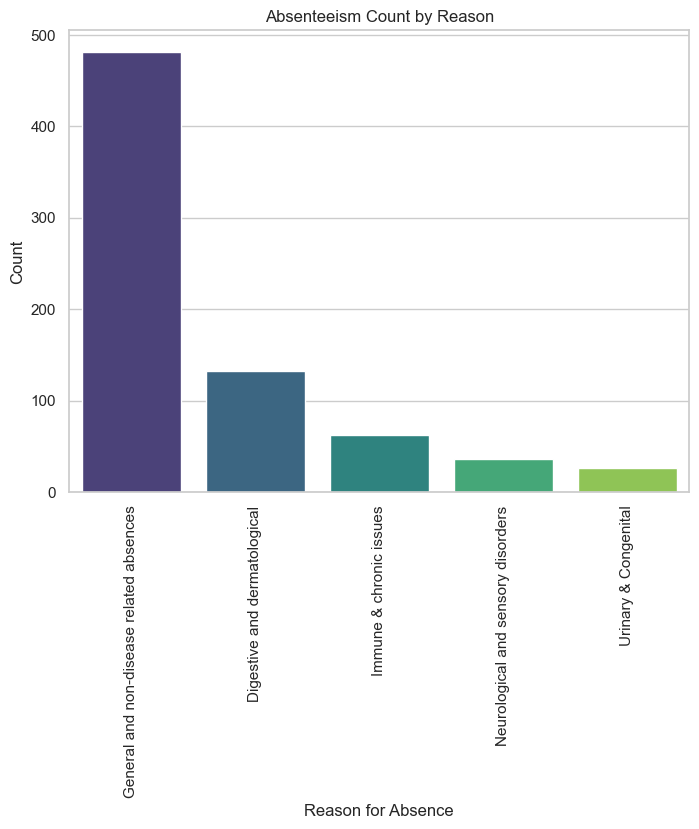

In [57]:
# Absenteeism Trends by Reason
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=treated_df, x="Reason_for_absence_c", order=treated_df["Reason_for_absence_c"].value_counts().index, palette="viridis")
plt.xticks(rotation=90)
plt.title("Absenteeism Count by Reason")
plt.xlabel("Reason for Absence")
plt.ylabel("Count")
plt.show()

### **Interpretation of Absenteeism Count by Reason** 

#### **Key Insights** 
- **General and Non-Disease Related Absences** account for the highest number of absenteeism cases, significantly exceeding other reasons.  
- **Digestive and Dermatological Issues** rank second but are considerably lower than general absences.  
- **Immune & Chronic Issues**, **Neurological and Sensory Disorders**, and **Urinary & Congenital Issues** contribute relatively fewer cases.  
#### **Conclusion**  
The data indicates that non-disease-related factors are the primary cause of absenteeism. Addressing workplace conditions, stress management, and general health concerns may help reduce absenteeism rates effectively.  


 ### **2) Absenteeism Across Employee Demographics**

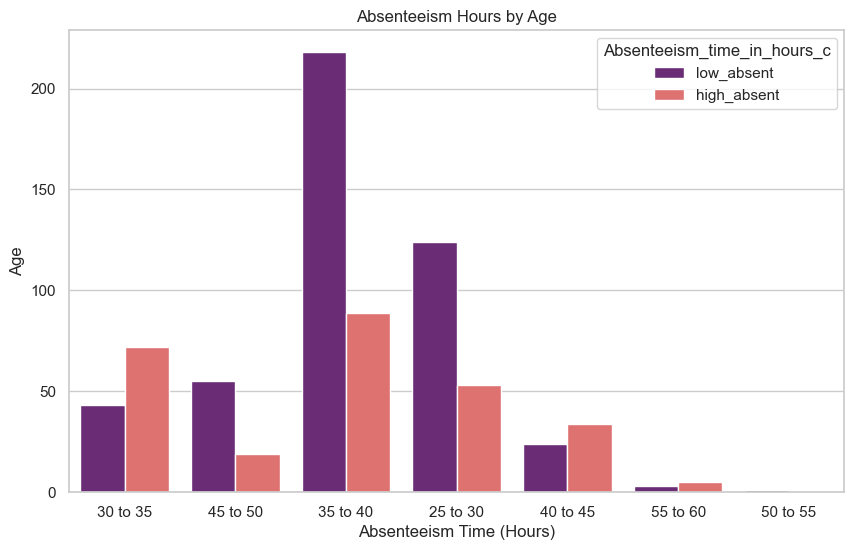

In [60]:
#Absenteeism by Age
plt.figure(figsize=(10, 6))
sns.countplot(data=treated_df, x="Age_c", hue="Absenteeism_time_in_hours_c", palette="magma")
plt.title("Absenteeism Hours by Age")
plt.xlabel("Absenteeism Time (Hours)")
plt.ylabel("Age")
plt.show()

### **Analysis of Absenteeism by Age** 
#### **Key Insights**  
- Employees aged **35 to 40** have the highest absenteeism, with a significant number falling into the **high absentee** category.  
- The **30 to 35** and **25 to 30** age groups also show moderate absenteeism but with a more balanced distribution between low and high absentee categories.  
- Absenteeism decreases significantly for employees above **50 years**, indicating better attendance among older employees.  

#### **Conclusion**  
Younger and mid-aged employees (25-40 years) tend to have higher absenteeism, possibly due to work-life balance challenges, health issues, or job-related stress. Organizations can implement targeted interventions such as flexible work policies, wellness programs, or engagement strategies to reduce absenteeism in these age groups.  


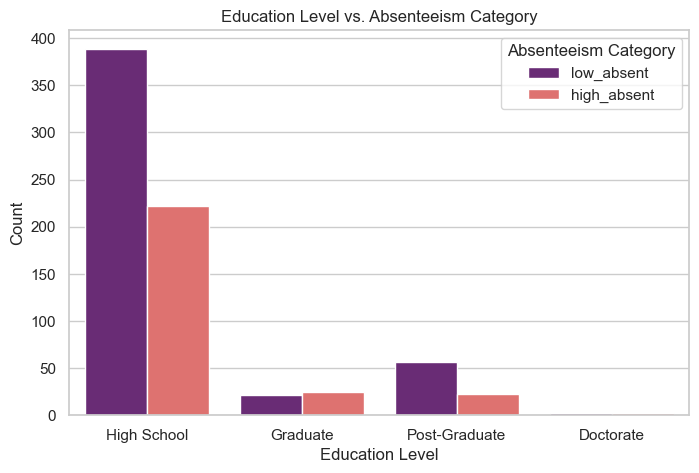

In [62]:
# Absenteeism by education level
plt.figure(figsize=(8, 5))
sns.countplot(data=treated_df, x="Education_c", hue="Absenteeism_time_in_hours_c", palette="magma")
plt.title("Education Level vs. Absenteeism Category")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Absenteeism Category")
plt.show()

### **Absenteeism Analysis by Education Level**

#### **Key Insights**  
- **High School** graduates have the highest absenteeism, with a significant number in the **high absentee** category.  
- **Graduates and Post-Graduates** show relatively lower absenteeism, indicating a possible correlation between higher education levels and better attendance.  
- **Doctorate holders** have minimal absenteeism, possibly due to higher job commitment or specialized roles with lower flexibility for absences.  

#### **Conclusion**  
Employees with lower education levels, especially those with only a **high school education**, tend to have higher absenteeism. This suggests that workplace training, career development opportunities, or structured attendance policies may help improve overall attendance rates.  



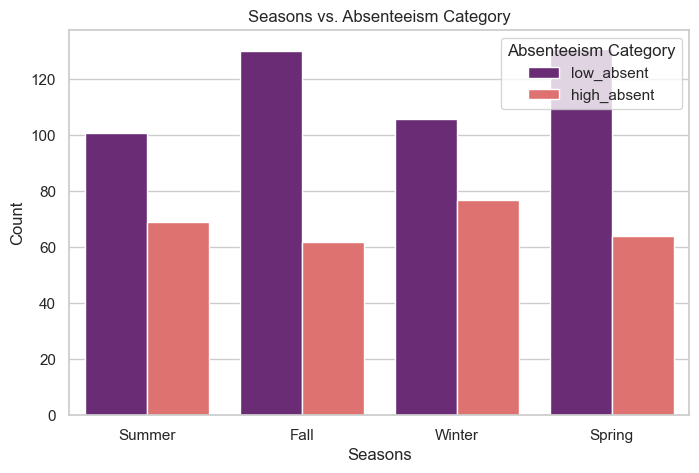

In [65]:
# Absenteeism by Season
plt.figure(figsize=(8, 5))
sns.countplot(data=treated_df, x="Seasons_c", hue="Absenteeism_time_in_hours_c", palette="magma")
plt.title("Seasons vs. Absenteeism Category")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.legend(title="Absenteeism Category")
plt.show()

### **Interpretation: Seasons vs. Absenteeism Category**  

- **Highest Absenteeism:**  
  - Fall has the highest absenteeism, particularly in the **high_absent** category.  

- **Seasonal Trends:**  
  - Absenteeism remains relatively **high** across all seasons, with **Fall and Winter** showing more absenteeism.  
  - **Spring and Summer** have lower absenteeism compared to Fall.  

- **Low vs. High Absence:**  
  - Across all seasons, **high_absent cases exceed low_absent cases**, indicating a general trend of **higher absenteeism**.  

### **Insights & Recommendations:**  
- **Potential Causes:** Seasonal illnesses, holidays, or environmental factors may contribute to higher absenteeism.  
- **Actionable Steps:**  
  - Implement **flexible work policies** in peak absenteeism seasons.  
  - Conduct **seasonal wellness programs** to reduce illness-related absences.  
  - Monitor **specific departments** to check for seasonal workload effects.  

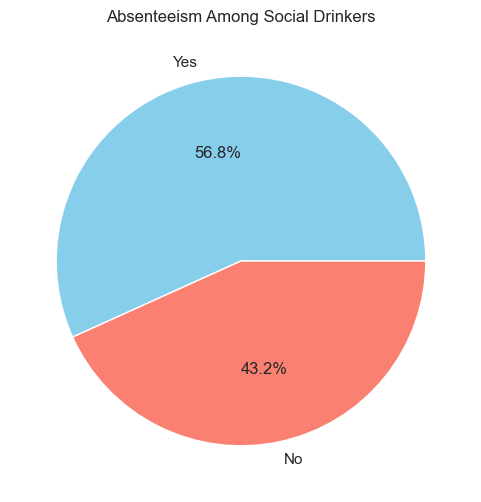

In [64]:
# Absenteeism by social drinking
plt.figure(figsize=(6, 6))
treated_df["Social_Drinker_c"].value_counts().plot.pie(autopct="%1.1f%%", colors=["skyblue", "salmon"])
plt.title("Absenteeism Among Social Drinkers")
plt.ylabel("")
plt.show()


### **Absenteeism and Social Drinking**

#### **Key Findings**
- **56.8% of absenteeism cases** involve social drinkers.
- **43.2% of absenteeism cases** are from non-drinkers.
- Social drinkers have a slightly higher absenteeism rate than non-drinkers.

#### **Patterns Observed**
- **Social drinking might contribute to absenteeism**, potentially due to health or lifestyle factors.
- **Further analysis** on the frequency of drinking and absenteeism severity could provide deeper insights.


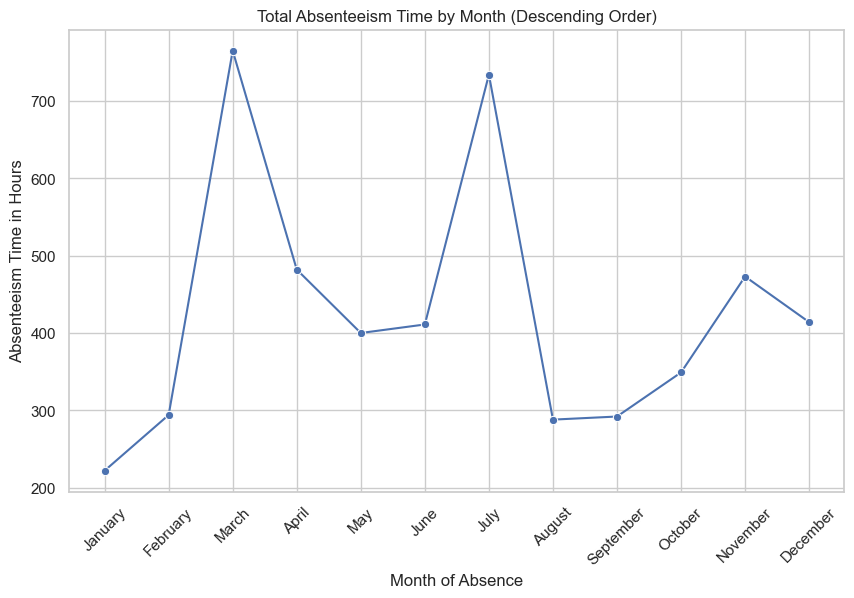

In [66]:
# "Month_of_absence_c" and "Absenteeism_time_in_hours" 
# Aggregating absenteeism time by month

monthly_data = treated_df.groupby('Month_of_absence_c')['Absenteeism_time_in_hours'].sum().reset_index()
monthly_data_sorted = monthly_data.sort_values(by='Absenteeism_time_in_hours', ascending=False)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month_of_absence_c', y='Absenteeism_time_in_hours', data=monthly_data_sorted, marker='o')
plt.title('Total Absenteeism Time by Month (Descending Order)')
plt.xlabel('Month of Absence')
plt.ylabel('Absenteeism Time in Hours')
plt.xticks(rotation=45)
plt.show()

### **Interpretation of Absenteeism Time by Month**

#### **Key Insights:**
1. **Peak Absenteeism:** The highest absenteeism time is observed in **March and July**, exceeding **700 hours**.
2. **Low Absenteeism:** August has the lowest absenteeism time, dropping below **300 hours**.
3. **Fluctuating Trend:** There is a sharp increase in absenteeism from January to March, followed by a decline in April. Another peak occurs in **July**, after which absenteeism drops significantly in **August**.
4. **Late-Year Trends:** Absenteeism shows a moderate increase towards the end of the year, with **November having higher absenteeism** than adjacent months.

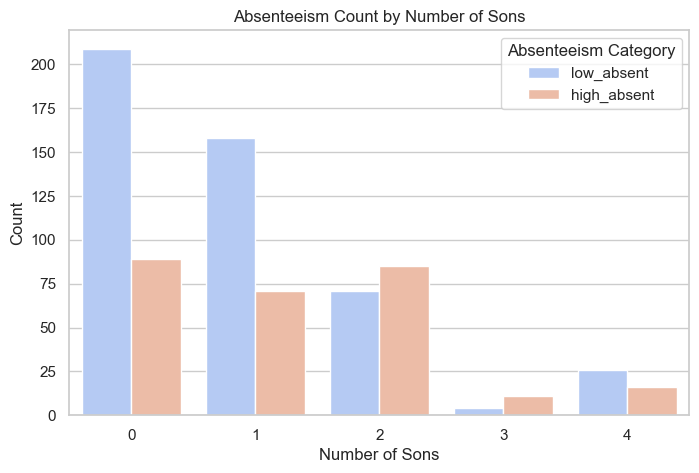

In [68]:
#Absenteeism Count by Number of Sons
plt.figure(figsize=(8, 5))
sns.countplot(data=treated_df, x="Son", hue="Absenteeism_time_in_hours_c", palette="coolwarm")
plt.title("Absenteeism Count by Number of Sons")
plt.xlabel("Number of Sons")
plt.ylabel("Count")
plt.legend(title="Absenteeism Category")
plt.show()

### **Absenteeism and Number of Sons**

#### **Key Findings**
- Employees **without sons** have the highest absenteeism rates.
- Employees with **one son** also show significant absenteeism.
- Absenteeism tends to **decrease** as the number of sons increases.

#### **Patterns Observed**
- Employees with more family responsibilities may have better attendance.
- Further analysis could explore **work-life balance** and **support systems** for employees with children.


###  **3) Work Characteristics Impact**

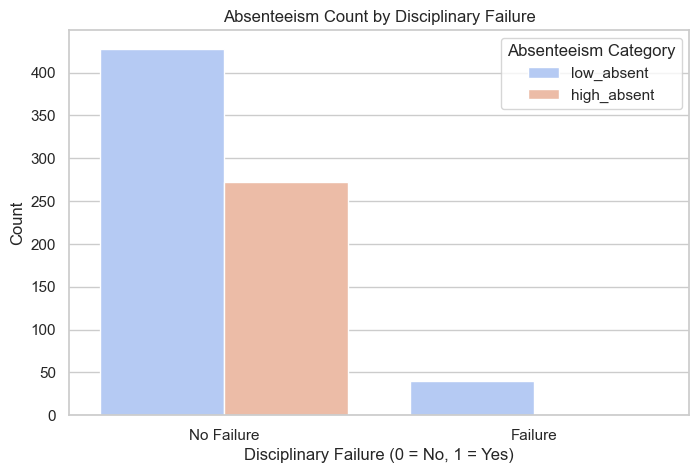

In [71]:
# Absenteeism Count by Disciplinary Failure
plt.figure(figsize=(8, 5))
sns.countplot(data=treated_df, x="Disciplinary_failure_c", hue="Absenteeism_time_in_hours_c", palette="coolwarm")
plt.title("Absenteeism Count by Disciplinary Failure")
plt.xlabel("Disciplinary Failure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Absenteeism Category")
plt.show()


### **Interpretation of Absenteeism Count by Disciplinary Failure**

#### **Key Insights:**
1. **Majority Without Disciplinary Failure:** The majority of employees fall under the **"No Failure"** category.
2. **Higher Absenteeism in No Failure Group:** Among employees with no disciplinary failures, both **low absenteeism (higher count)** and **high absenteeism** exist, with low absenteeism being more common.
3. **Minimal Failures with Low Absenteeism:** Employees with disciplinary failures are very few, and most of them belong to the **low absenteeism** category.
4. **Absence of High Absenteeism in Failure Group:** Employees with disciplinary failures do not exhibit high absenteeism, possibly due to **strict monitoring or consequences**.


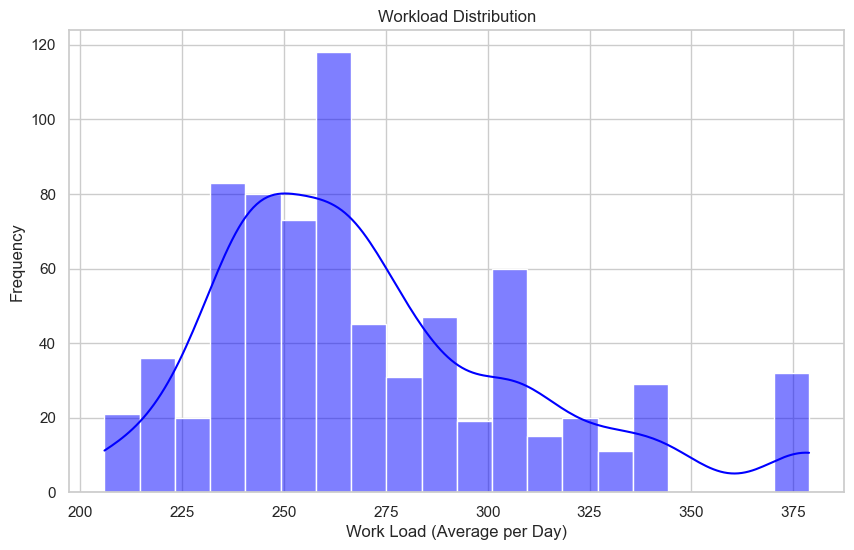

In [73]:
# Workload vs. absenteeism
plt.figure(figsize=(10, 6))
sns.histplot(treated_df["Work_load_Average/day_"], bins=20, kde=True, color="blue")
plt.title("Workload Distribution")
plt.xlabel("Work Load (Average per Day)")
plt.ylabel("Frequency")
plt.show()

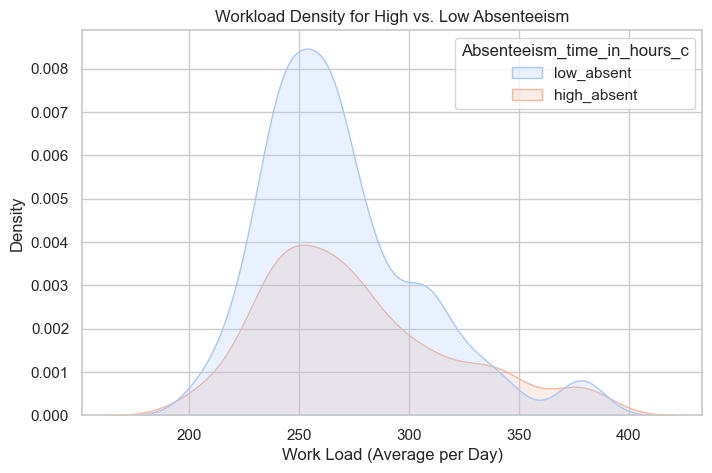

In [74]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=treated_df, x="Work_load_Average/day_", hue="Absenteeism_time_in_hours_c", fill=True, palette="coolwarm")
plt.title("Workload Density for High vs. Low Absenteeism")
plt.xlabel("Work Load (Average per Day)")
plt.ylabel("Density")
plt.show()


### **Workload and Absenteeism Patterns**

#### **Key Insights**
- The **low absenteeism** category (blue) has a peak at around **250 work units per day**.
- The **high absenteeism** category (red) is more spread out but also peaks slightly below **250 work units**.
- **High absenteeism cases** have a broader distribution, indicating absenteeism occurs across **varied workload levels**.

#### **Interpretation**
- Employees with **moderate workloads (around 250 units/day)** tend to have lower absenteeism.
- Higher absenteeism cases appear across **a wider range of workload levels**, suggesting that factors beyond just workload contribute to absenteeism.


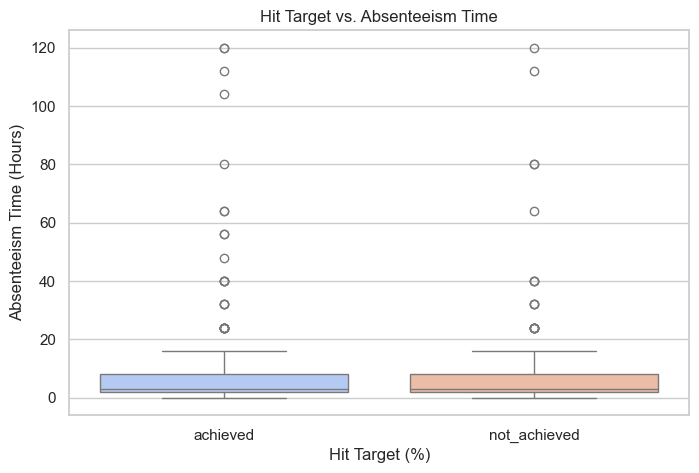

In [76]:
#Hit Target vs. Absenteeism Time
plt.figure(figsize=(8, 5))
sns.boxplot(x="Hit_target_c", y="Absenteeism_time_in_hours", data=treated_df, palette="coolwarm")
plt.title("Hit Target vs. Absenteeism Time")
plt.xlabel("Hit Target (%)")
plt.ylabel("Absenteeism Time (Hours)")
plt.show()


### **Hit Target vs. Absenteeism Time**

#### **Key Insights**
- The **median absenteeism time** is similar for employees who **achieved** and **did not achieve** their targets.
- Both groups have a **similar range of absenteeism hours**, with some employees being absent for up to **15-17 hours**.
- There is **no clear distinction** in absenteeism time between target achievers and non-achievers.

#### **Interpretation**
- Meeting targets may **not be a strong indicator** of absenteeism levels.
- Other factors (e.g., job role, workload, work environment) might play a bigger role in influencing absenteeism.


## **TASK-4: PREDICTING ABSENTEEISM DURATION**

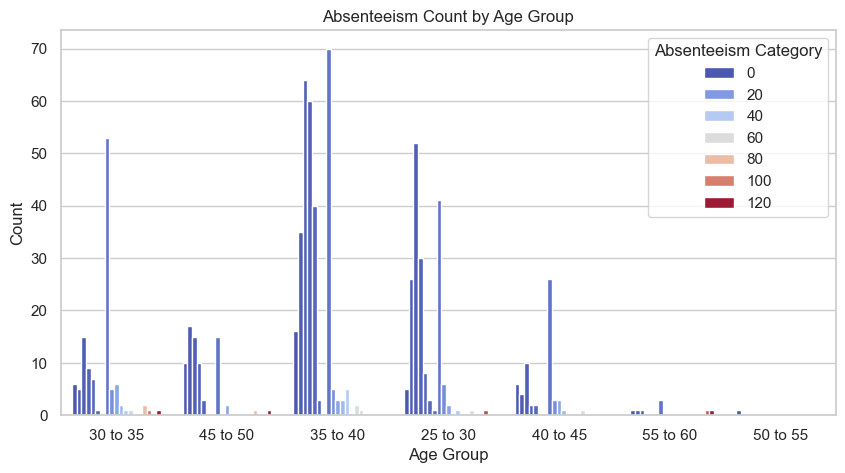

In [79]:
#Visualizing Absenteeism by Age Group
plt.figure(figsize=(10, 5))
sns.countplot(data=treated_df, x="Age_c", hue="Absenteeism_time_in_hours", palette="coolwarm")
plt.title("Absenteeism Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Absenteeism Category")
plt.show()


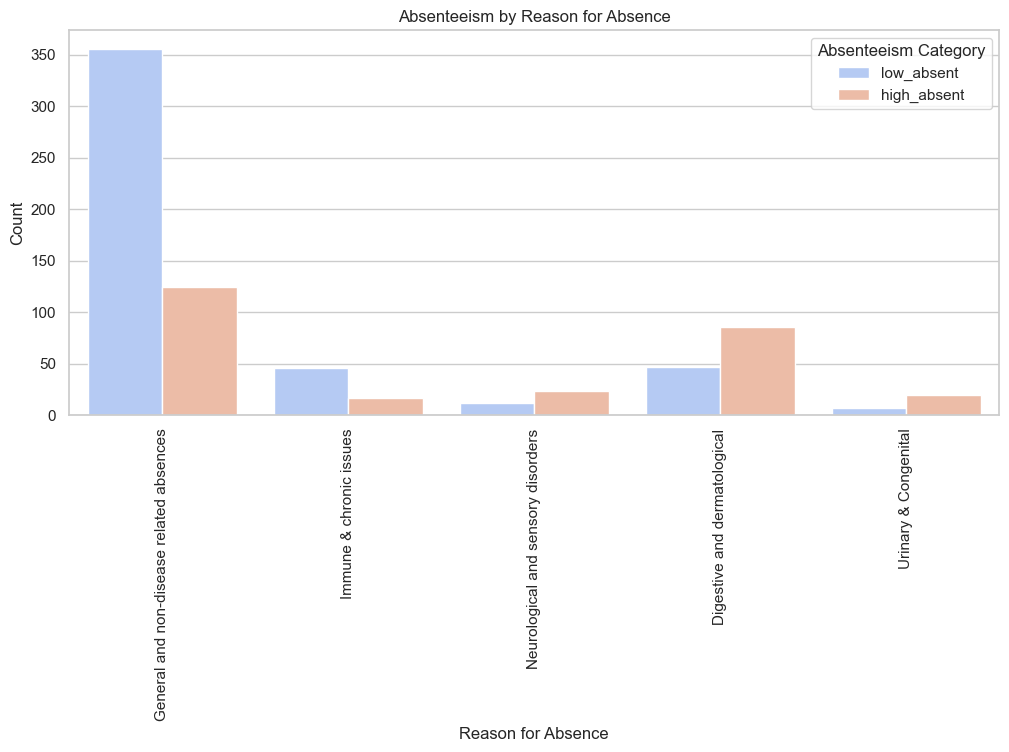

In [80]:
#Absenteeism by Reason for Absence
plt.figure(figsize=(12, 5))
sns.countplot(data=treated_df, x="Reason_for_absence_c", hue="Absenteeism_time_in_hours_c", palette="coolwarm")
plt.title("Absenteeism by Reason for Absence")
plt.xlabel("Reason for Absence")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Absenteeism Category")
plt.show()


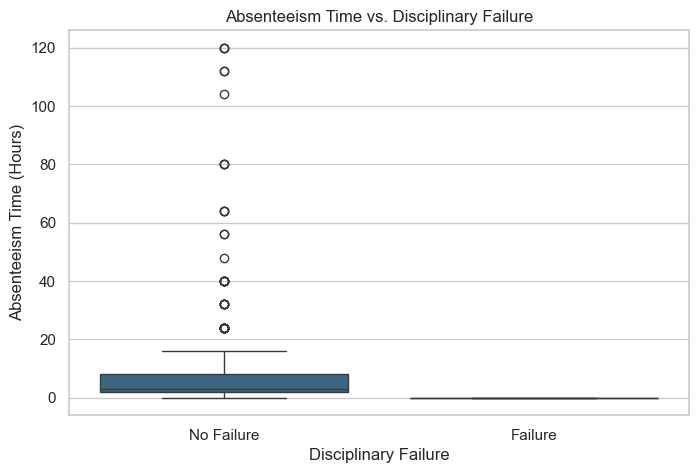

In [81]:
#Absenteeism by Disciplinary Failure
plt.figure(figsize=(8, 5))
sns.boxplot(data=treated_df, x="Disciplinary_failure_c", y="Absenteeism_time_in_hours", palette="viridis")
plt.title("Absenteeism Time vs. Disciplinary Failure")
plt.xlabel("Disciplinary Failure")
plt.ylabel("Absenteeism Time (Hours)")
plt.show()

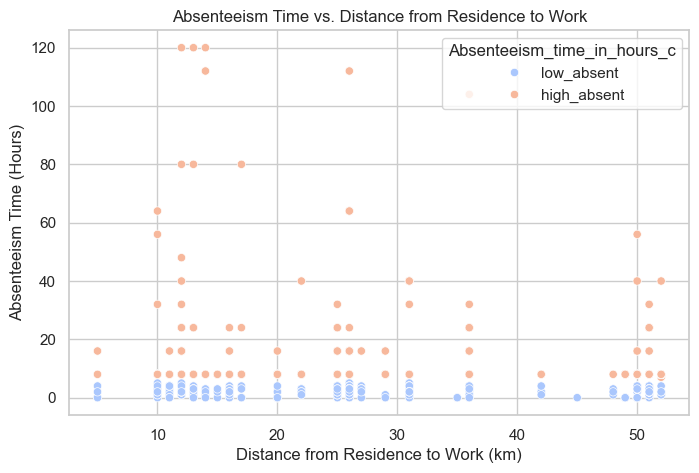

In [82]:
# Absenteeism by Distance from Residence to Work
plt.figure(figsize=(8, 5))
sns.scatterplot(data=treated_df, x="Distance_from_Residence_to_Work", y="Absenteeism_time_in_hours", hue="Absenteeism_time_in_hours_c", palette="coolwarm")
plt.title("Absenteeism Time vs. Distance from Residence to Work")
plt.xlabel("Distance from Residence to Work (km)")
plt.ylabel("Absenteeism Time (Hours)")
plt.show()

### **Interpretation of Absenteeism Time vs. Distance from Residence to Work**

#### **Key Insights:**
1. **No Clear Correlation:** Absenteeism time does not show a strong relationship with the distance from residence to work.
2. **High Absenteeism Across Distances:** Employees with **high absenteeism** (orange points) are scattered across all distance ranges, including short (0-10 km) and long (40-50 km) commutes.
3. **Low Absenteeism Clusters:** Employees with **low absenteeism** (blue points) are concentrated near the lower absenteeism range, regardless of the commuting distance.
4. **Frequent High Absenteeism at Short Distances:** A significant number of high absenteeism cases are seen within **0-15 km**, indicating that proximity to work does not necessarily reduce absenteeism.
5. **Sparse Data for Very Long Distances:** There are fewer employees commuting beyond **50 km**, but absenteeism levels remain varied.

#### **Possible Implications:**
- **Commuting distance is not the sole factor influencing absenteeism.**
- **Other factors, such as job satisfaction, work environment, or personal health, may play a bigger role.**
- **Companies may need to investigate underlying causes of high absenteeism, especially among employees living closer to work.**

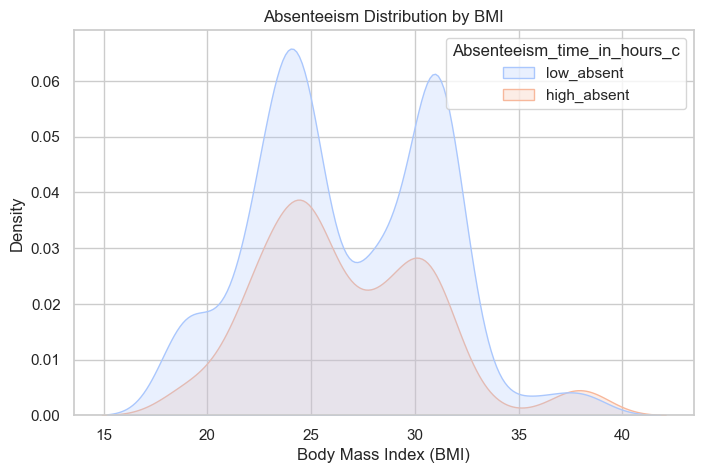

In [84]:
# Absenteeism Distribution by BMI
plt.figure(figsize=(8, 5))
sns.kdeplot(data=treated_df, x="Body_mass_index", hue="Absenteeism_time_in_hours_c", fill=True, palette="coolwarm")
plt.title("Absenteeism Distribution by BMI")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Density")
plt.show()


In [85]:
# removing first column from the data
columns_to_drop=["ID"]
treated_df=treated_df.drop(columns_to_drop,axis=1)
treated_df.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,...,Education_c,Seasons_c,Day_of_the_week_c,Month_of_absence_c,Reason_for_absence_c,Absenteeism_time_in_hours_c,Hit_target_c,Age_c,Distance_c,Workload_c
0,26,7,3,1,289,36,13,33,239.554,97,...,High School,Spring,Tuesday,July,General and non-disease related absences,low_absent,achieved,30 to 35,Far,Low workload
1,0,7,3,1,118,13,18,50,239.554,97,...,High School,Spring,Tuesday,July,Immune & chronic issues,low_absent,achieved,45 to 50,Close,Low workload
2,23,7,4,1,179,51,18,38,239.554,97,...,High School,Spring,Wednesday,July,General and non-disease related absences,low_absent,achieved,35 to 40,Far,Low workload
3,7,7,5,1,279,5,14,39,239.554,97,...,High School,Spring,Thursday,July,Neurological and sensory disorders,low_absent,achieved,35 to 40,Close,Low workload
4,23,7,5,1,289,36,13,33,239.554,97,...,High School,Spring,Thursday,July,General and non-disease related absences,low_absent,achieved,30 to 35,Far,Low workload


In [86]:
# Selecting only numerical columns
numerical_cols = treated_df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = treated_df[numerical_cols]

# Display selected numerical columns
print("Selected Numerical Columns:")
print(numerical_cols)

Selected Numerical Columns:
Index(['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')


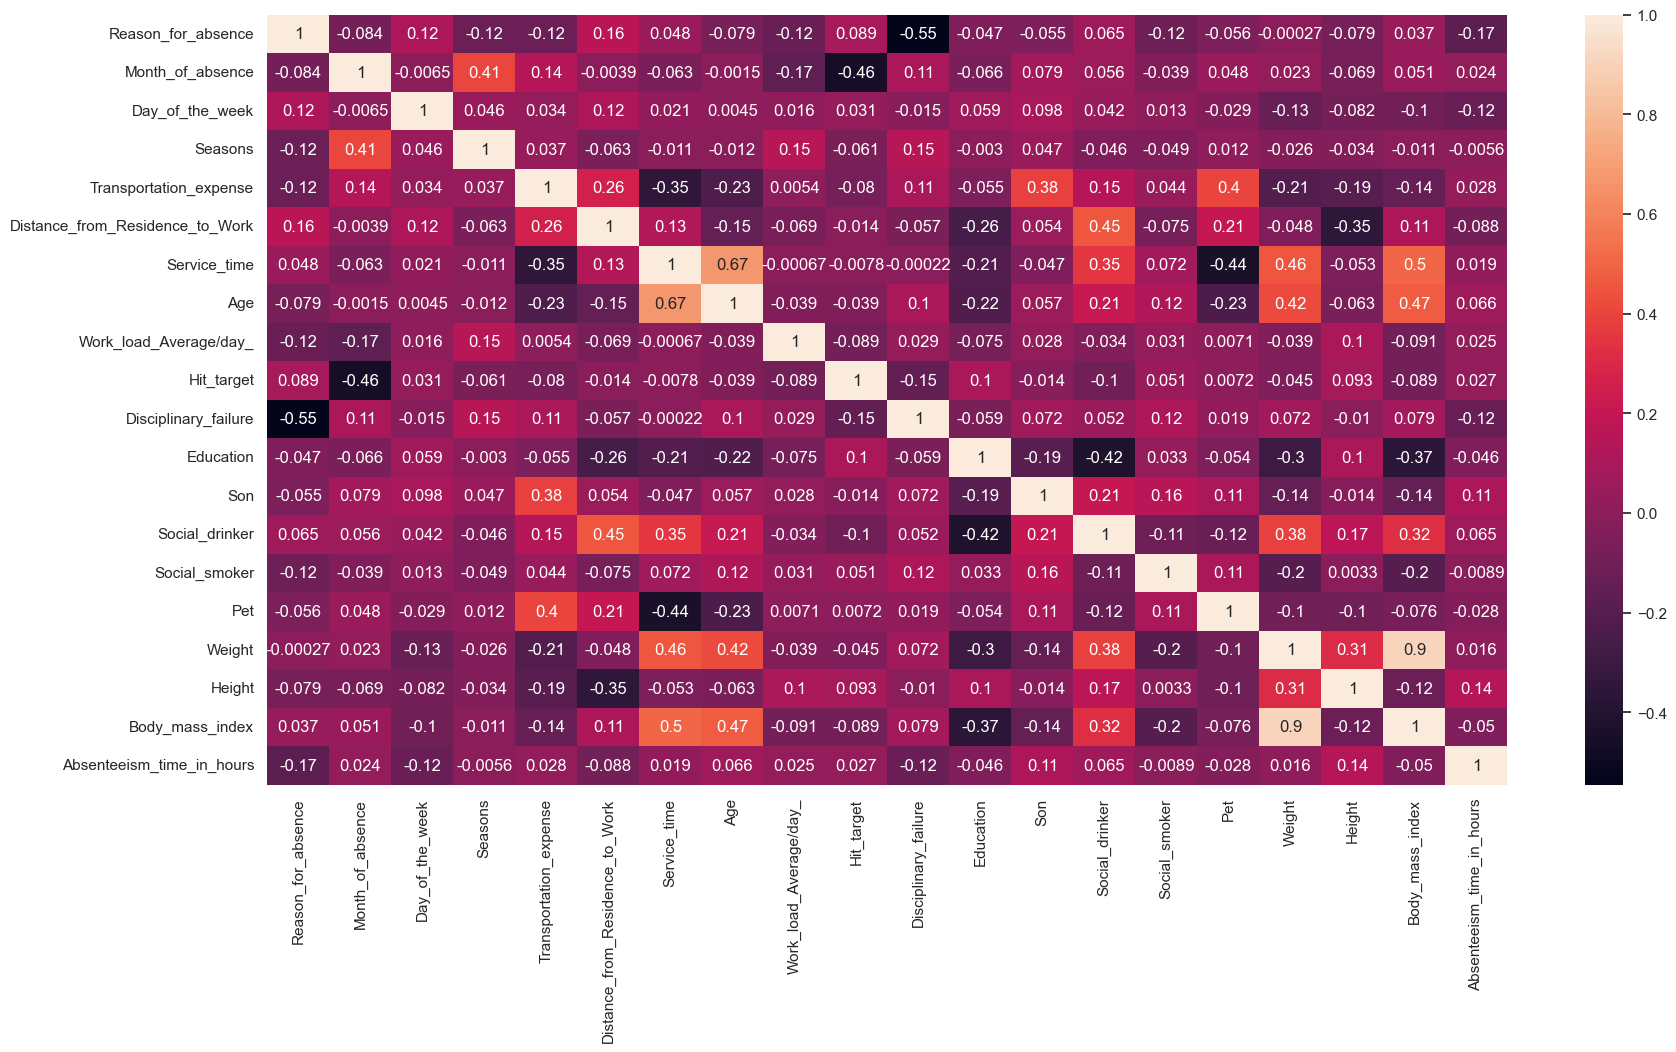

In [87]:
# Compute correlation matrix
corr_matrix = df_numerical.corr()

# Plotting heatmap
fig,ax=plt.subplots(1,1,figsize=(20,10))
ax=sns.heatmap(df_numerical.corr(),annot=True)
plt.show()


In [88]:
corr_matrix

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
Reason_for_absence,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,0.088943,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month_of_absence,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,-0.460453,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day_of_the_week,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,0.030986,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,-0.061154,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation_expense,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,-0.080193,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance_from_Residence_to_Work,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,-0.013865,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service_time,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,-0.007840,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,-0.039224,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work_load_Average/day_,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,-0.089445,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749
Hit_target,0.088943,-0.460453,0.030986,-0.061154,-0.080193,-0.013865,-0.007840,-0.039224,-0.089445,1.000000,-0.147971,0.101062,-0.014091,-0.102480,0.051254,0.007201,-0.044947,0.093267,-0.088939,0.026695


In [89]:
df_numerical.corr()[["Absenteeism_time_in_hours"]].sort_values(["Absenteeism_time_in_hours"])

,Absenteeism_time_in_hours
Reason_for_absence,-0.173116
Day_of_the_week,-0.124361
Disciplinary_failure,-0.124248
Distance_from_Residence_to_Work,-0.088363
Body_mass_index,-0.049719
Education,-0.046235
Pet,-0.028277
Social_smoker,-0.008936
Seasons,-0.005615
Weight,0.015789


In [90]:
# Feature selection based on correlation
col_to_drop = ["Month_of_absence","Seasons","Age","Hit_target","Social_smoker","Pet","Weight","Height"]
df_select=treated_df.drop(col_to_drop,axis=1)
df_select = df_select.select_dtypes(exclude=['object', 'category'])
df_select

,Reason_for_absence,Day_of_the_week,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Work_load_Average/day_,Disciplinary_failure,Education,Son,Social_drinker,Body_mass_index,Absenteeism_time_in_hours
0,26,3,289,36,13,239.554,0,1,2,1,30,4
1,0,3,118,13,18,239.554,1,1,1,1,31,0
2,23,4,179,51,18,239.554,0,1,0,1,31,2
3,7,5,279,5,14,239.554,0,1,2,1,24,4
4,23,5,289,36,13,239.554,0,1,2,1,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,3,289,36,13,264.604,0,1,2,1,30,8
736,11,3,235,11,14,264.604,0,3,1,0,29,4
737,0,3,118,14,13,271.219,0,1,1,1,34,0
738,0,4,231,35,14,271.219,0,1,2,1,35,0


In [91]:
new_corr=df_select.corr()
new_corr

,Reason_for_absence,Day_of_the_week,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Work_load_Average/day_,Disciplinary_failure,Education,Son,Social_drinker,Body_mass_index,Absenteeism_time_in_hours
Reason_for_absence,1.000000,0.116319,-0.119381,0.161831,0.048425,-0.123472,-0.545054,-0.047357,-0.055364,0.065441,0.037205,-0.173116
Day_of_the_week,0.116319,1.000000,0.033988,0.118026,0.021252,0.015646,-0.015120,0.058516,0.098079,0.041772,-0.103578,-0.124361
Transportation_expense,-0.119381,0.033988,1.000000,0.262183,-0.349887,0.005438,0.109222,-0.055065,0.383001,0.145117,-0.136517,0.027585
Distance_from_Residence_to_Work,0.161831,0.118026,0.262183,1.000000,0.131730,-0.068677,-0.056527,-0.259605,0.054230,0.452196,0.113772,-0.088363
Service_time,0.048425,0.021252,-0.349887,0.131730,1.000000,-0.000668,-0.000221,-0.213000,-0.047128,0.353141,0.499718,0.019029
Work_load_Average/day_,-0.123472,0.015646,0.005438,-0.068677,-0.000668,1.000000,0.029026,-0.074960,0.027820,-0.033713,-0.090709,0.024749
Disciplinary_failure,-0.545054,-0.015120,0.109222,-0.056527,-0.000221,0.029026,1.000000,-0.059298,0.072096,0.051838,0.079428,-0.124248
Education,-0.047357,0.058516,-0.055065,-0.259605,-0.213000,-0.074960,-0.059298,1.000000,-0.188622,-0.420013,-0.366884,-0.046235
Son,-0.055364,0.098079,0.383001,0.054230,-0.047128,0.027820,0.072096,-0.188622,1.000000,0.206376,-0.144150,0.113756
Social_drinker,0.065441,0.041772,0.145117,0.452196,0.353141,-0.033713,0.051838,-0.420013,0.206376,1.000000,0.323978,0.065067


In [92]:
#selected_features = ["Reason_for_absence","Education",'Disciplinary_failure',"Distance_from_Residence_to_Work","Service_time","Work_load_Average/day_","Son","Social_drinker","Body_mass_index","Day_of_the_week","Transportation_expense"]

In [93]:
# Scaling data
cols=df_select.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_select)

df_scaled=pd.DataFrame(df_scaled,columns=cols)
df_scaled

,Reason_for_absence,Day_of_the_week,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Work_load_Average/day_,Disciplinary_failure,Education,Son,Social_drinker,Body_mass_index,Absenteeism_time_in_hours
0,0.804938,-0.643947,1.011408,0.429556,0.101770,-0.818212,-0.239046,-0.433857,0.893723,0.872872,0.775932,-0.219511
1,-2.280124,-0.643947,-1.544379,-1.121694,1.242825,-0.818212,4.183300,-0.433857,-0.017234,0.872872,1.009438,-0.519767
2,0.448970,0.059924,-0.632665,1.441240,1.242825,-0.818212,-0.239046,-0.433857,-0.928191,0.872872,1.009438,-0.369639
3,-1.449530,0.763796,0.861947,-1.661258,0.329981,-0.818212,-0.239046,-0.433857,0.893723,0.872872,-0.625100,-0.219511
4,0.448970,0.763796,1.011408,0.429556,0.101770,-0.818212,-0.239046,-0.433857,0.893723,0.872872,0.775932,-0.369639
...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.618937,-0.643947,1.011408,0.429556,0.101770,-0.176427,-0.239046,-0.433857,0.893723,0.872872,0.775932,0.080744
736,-0.974905,-0.643947,0.204318,-1.256585,0.329981,-0.176427,-0.239046,2.538869,-0.017234,-1.145644,0.542427,-0.219511
737,-2.280124,-0.643947,-1.544379,-1.054248,0.101770,-0.006949,-0.239046,-0.433857,-0.017234,0.872872,1.709954,-0.519767
738,-2.280124,0.059924,0.144533,0.362110,0.329981,-0.006949,-0.239046,-0.433857,0.893723,0.872872,1.943459,-0.519767


In [94]:
abs(df_scaled.corr())>=0.7

,Reason_for_absence,Day_of_the_week,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Work_load_Average/day_,Disciplinary_failure,Education,Son,Social_drinker,Body_mass_index,Absenteeism_time_in_hours
Reason_for_absence,True,False,False,False,False,False,False,False,False,False,False,False
Day_of_the_week,False,True,False,False,False,False,False,False,False,False,False,False
Transportation_expense,False,False,True,False,False,False,False,False,False,False,False,False
Distance_from_Residence_to_Work,False,False,False,True,False,False,False,False,False,False,False,False
Service_time,False,False,False,False,True,False,False,False,False,False,False,False
Work_load_Average/day_,False,False,False,False,False,True,False,False,False,False,False,False
Disciplinary_failure,False,False,False,False,False,False,True,False,False,False,False,False
Education,False,False,False,False,False,False,False,True,False,False,False,False
Son,False,False,False,False,False,False,False,False,True,False,False,False
Social_drinker,False,False,False,False,False,False,False,False,False,True,False,False


### **Multiple Linear Regression**

### **1. One feature: 'Reason_for_absence'**

In [97]:
# 1. One feature: 'Reason_for_absence'
X1=np.array(df_scaled["Reason_for_absence"]).reshape(-1,1)
y=np.array(df_scaled["Absenteeism_time_in_hours"])

In [98]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y, test_size = 0.2, random_state = 42)
s_model1 = LinearRegression().fit(X_train1, y_train1)
s_r_sq1 = s_model1.score(X_train1,y_train1)
y_pred1 = s_model1.predict(X_test1)

In [99]:
# Print Intercept and Slope
print("Intercept:",s_model1.intercept_)
print("Slope:",s_model1.coef_)

Intercept: 0.014909663136513773
Slope: [-0.18926288]


In [100]:
# Calculating MSE, MAE, RMSE, R-Square

from sklearn.metrics import r2_score
MSE1=mean_squared_error(y_test1,y_pred1)
print('MSE1',MSE1)
MAE1=mean_absolute_error(y_test1,y_pred1)
print('MAE1',MAE1)
RMSE1=np.sqrt(MSE1)
print('RMSE1',RMSE1)
#R2 score
r2_1=r2_score(y_test1,y_pred1)
print(f"the R2_score of the model is:",r2_1)

MSE1 0.6117208083236167
MAE1 0.40376843627516495
RMSE1 0.7821258264011084
the R2_score of the model is: 0.0037471082176815385


###  **2.Two features: 'Reason_for_absence' and 'Disciplinary_failure'**

In [102]:
#2. Two features: 'Reason_for_absence' and 'Disciplinary_failure'
X2=np.array(df_scaled[['Reason_for_absence','Disciplinary_failure']]).reshape(-1,2)
y=np.array(df_scaled["Absenteeism_time_in_hours"])

In [103]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y, test_size = 0.2, random_state = 42)
mult_model = LinearRegression().fit(X_train2, y_train2)
s_r_sq2 = mult_model.score(X_train2,y_train2)
y_pred2 = mult_model.predict(X_test2)
print(mult_model.intercept_)
print(mult_model.coef_)

0.01065068630802337
[-0.3560664  -0.32086938]


In [104]:
# Print Intercept and Slope
print("Intercept:",mult_model.intercept_)
print("Slope:",mult_model.coef_)

Intercept: 0.01065068630802337
Slope: [-0.3560664  -0.32086938]


In [105]:
from sklearn.metrics import r2_score
MSE2=mean_squared_error(y_test2,y_pred2)
print('MSE2:',MSE2)
MAE2=mean_absolute_error(y_test2,y_pred2)
print('MAE2:',MAE2)
RMSE2=np.sqrt(MSE2)
print('RMSE2:',RMSE2)
#R2 score
r2_2=r2_score(y_test2,y_pred2)
print(f"the R2_score of the model is:",r2_2)

MSE2: 0.548529080836877
MAE2: 0.36099683906333535
RMSE2: 0.7406274912780898
the R2_score of the model is: 0.10666160840921313


### **3. Three features: 'Reason_for_absence','Disciplinary_failure',Distance_from_Residence_to_Work**

In [107]:
# 3. Three features: 'Reason_for_absence','Disciplinary_failure',Distance_from_Residence_to_Work 	
X3=np.array(df_scaled[['Reason_for_absence','Disciplinary_failure','Distance_from_Residence_to_Work']]).reshape(-1,3)
y=np.array(df_scaled["Absenteeism_time_in_hours"])


In [108]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y, test_size = 0.2, random_state = 42)
mult_model_3 = LinearRegression().fit(X_train3, y_train3)
s_r_sq3 = mult_model_3.score(X_train3,y_train3)
y_pred3 = mult_model_3.predict(X_test3)
print(mult_model_3.intercept_)
print(mult_model_3.coef_)

0.010177743923192338
[-0.34710655 -0.32083329 -0.05529391]


In [109]:
# Print Intercept and Slope
print("Intercept:",mult_model_3.intercept_)
print("Slope:",mult_model_3.coef_)

Intercept: 0.010177743923192338
Slope: [-0.34710655 -0.32083329 -0.05529391]


In [110]:
from sklearn.metrics import r2_score
MSE3=mean_squared_error(y_test3,y_pred3)
print('MSE3:',MSE3)
MAE3=mean_absolute_error(y_test3,y_pred3)
print('MAE3:',MAE3)
RMSE3=np.sqrt(MSE3)
print('RMSE3:',RMSE3)
#R2 score
r2_3=r2_score(y_test3,y_pred3)
print(f"the R2_score of the model is:",r2_3)

MSE3: 0.5474449524329551
MAE3: 0.3698148805845268
RMSE3: 0.7398952307137512
the R2_score of the model is: 0.10842722769627045


#### **4. Four features:'Reason_for_absence','Disciplinary_failure','Distance_from_Residence_to_Work','Body_mass_index'**

In [112]:
#4. Four features:'Reason_for_absence','Disciplinary_failure','Distance_from_Residence_to_Work','Body_mass_index'
X4=np.array(df_scaled[['Reason_for_absence','Disciplinary_failure','Distance_from_Residence_to_Work','Body_mass_index']]).reshape(-1,4)
y=np.array(df_scaled["Absenteeism_time_in_hours"])


In [113]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y, test_size = 0.2, random_state = 42)
mult_model_4 = LinearRegression().fit(X_train4, y_train4)
s_r_sq4 = mult_model_4.score(X_train4,y_train4)
y_pred4 = mult_model_4.predict(X_test4)


In [114]:
print(mult_model_4.intercept_)
print(mult_model_4.coef_)

0.009642210124261828
[-0.34529219 -0.31632827 -0.05233187 -0.02676897]


In [115]:
from sklearn.metrics import r2_score
MSE4=mean_squared_error(y_test4,y_pred4)
print('MSE4:',MSE4)
MAE4=mean_absolute_error(y_test4,y_pred4)
print('MAE4:',MAE4)
RMSE4=np.sqrt(MSE4)
print('RMSE4:',RMSE4)
#R2 score
r2_4=r2_score(y_test4,y_pred4)
print(f"the R2_score of the model is:",r2_4)

MSE4: 0.5519081846669306
MAE4: 0.37136873471561593
RMSE4: 0.7429052326285841
the R2_score of the model is: 0.10115837569828212


#### **5. Five features:'Reason_for_absence','Disciplinary_failure','Distance_from_Residence_to_Work','Body_mass_index','Education'**

In [117]:
#5. Five features:'Reason_for_absence','Disciplinary_failure','Distance_from_Residence_to_Work','Body_mass_index','Education'
X5=np.array(df_scaled[['Reason_for_absence','Disciplinary_failure','Distance_from_Residence_to_Work','Body_mass_index','Education']]).reshape(-1,5)
y=np.array(df_scaled["Absenteeism_time_in_hours"])

In [118]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y, test_size = 0.2, random_state = 42)
mult_model_5 = LinearRegression().fit(X_train5, y_train5)
s_r_sq5 = mult_model_5.score(X_train5,y_train5)
y_pred5 = mult_model_5.predict(X_test5)

In [119]:
print("Intercept:",mult_model_5.intercept_)
print("Slope:",mult_model_5.coef_)

Intercept: 0.00816039388124282
Slope: [-0.34701287 -0.3191765  -0.0758989  -0.07063792 -0.11838138]


In [202]:
from sklearn.metrics import r2_score
MSE5=mean_squared_error(y_test5,y_pred5)
print('MSE5:',MSE5)
MAE5=mean_absolute_error(y_test5,y_pred5)
print('MAE5:',MAE5)
RMSE5=np.sqrt(MSE5)
print('RMSE5:',RMSE5)
#R2 score
r2_5=r2_score(y_test5,y_pred5)
print(f"the R2_score of the model is:",r2_5)

MSE5: 0.5401582771915662
MAE5: 0.36935254978097526
RMSE5: 0.7349546089328008
the R2_score of the model is: 0.12029435920779485


### **Model Performance Interpretation**

#### **Key Observations:**
1. **Increasing Features Improves Performance:** As the number of features increases from **1 to 5**, the **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)** decrease, indicating a reduction in prediction errors.
2. **R² Score Improvement:** The **R² score** improves progressively, from **0.0037 (1 feature) to 0.1203 (5 features)**, showing that adding features helps explain more variance in absenteeism time.
3. **Diminishing Returns:** While adding the **second feature significantly improves the model (R² jumps from 0.0037 to 0.1067)**, the improvement slows down as more features are added (R² only increases slightly from **0.1067 to 0.1203**).
4. **Lowest MSE with 5 Features:** The model with **five features (MSE = 0.5402)** has the **lowest prediction error**, indicating better performance compared to models with fewer features.

#### **Conclusion:**
- **Adding features enhances model performance, but improvements diminish after a certain point.**  
- The **best-performing model includes five features**, suggesting that **'Reason for absence', 'Disciplinary failure', 'Distance from Residence to Work', 'Body mass index', and 'Education'** are useful predictors of absenteeism time.

## **Multiple Linear Regression Model Explanation** 

### **Equation Representation:**  
Given:  
- **Intercept:** 0.00816  
- **Slopes:**  
  - -0.3470 (Reason_for_absence)  
  - -0.3192 (Disciplinary_failure)  
  - -0.0759 (Distance_from_Residence_to_Work)  
  - -0.0706 (Body_mass_index)  
  - -0.1184 (Education)  

#### The regression equation:  [y = 0.00816 - 0.3470(x_1) - 0.3192(x_2) - 0.0759(x_3) - 0.0706(x_4) - 0.1184(x_5)]

### **Interpretation:**  
- **Intercept (0.00816):** Baseline absenteeism time when all factors are zero.  
- **Negative coefficients:** An increase in any factor **reduces absenteeism time**.  
  - **Disciplinary_failure (-0.3192):** Stricter policies reduce absences.  
  - **Education (-0.1184):** Higher education correlates with fewer absences.  
  - **Distance (-0.0759) & BMI (-0.0706):** Minimal impact but inversely related.  

### **Conclusion:**  
The model predicts absenteeism based on workplace discipline, commute distance, health (BMI), and education, suggesting absenteeism decreases with stricter policies and higher education.  


## **Assumption to check model's homoscedasticity**

In [236]:
#Assumption to check model's homoscedasticity
def calculate_residuals(model, features, label):
    """print(mult_model_5.intercept_)
print(mult_model_5.coef_)
    Creates predictions on the features with the model and calculates residuals
    """
    prediction=model.predict(features)
    df_results=pd.DataFrame({'Actual':label,'Predicted':prediction})
    df_results['Residual']=abs(df_results['Actual'])-abs(df_results['Predicted'])
    return df_results

def linear_assumption(model, features, label):
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')   
    print('Checking with a scatter plot of actual vs. predicted.','Predictions should follow the diagonal line.')
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)  
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--') # X and y points
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


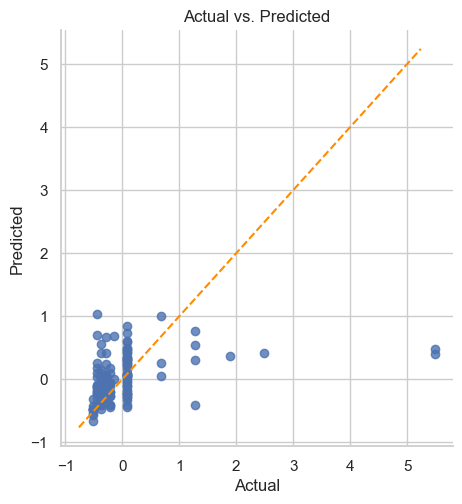

In [238]:
# calling the function
linear_assumption(mult_model_5, X_test5, y_test5)

### **Interpretation of the Actual vs. Predicted Scatter Plot**

**The scatter plot visualizes actual vs. predicted values, with the diagonal dashed line representing an ideal fit (where predicted values exactly match actual values). This helps assess homoscedasticity, a key assumption in linear regression.**

#### **Key Observations:**
Clustered Points Near Zero:Most actual values are concentrated around 0, with very few higher values.
The model might be struggling with variance in predictions for higher actual values.

#### **Deviation from the Diagonal Line:**
If predictions closely follow the line, the model has a good fit.
Here, some points deviate, indicating potential heteroscedasticity (unequal variance of residuals).

#### **Homoscedasticity Check:**
Ideally, residuals (errors) should be randomly dispersed.
If errors increase with actual values, the model may suffer from heteroscedasticity, leading to biased standard errors.

## **Checking Homoscedasticity: Plotting the residuals of linear regression**

In [240]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption: Homoscedasticity of Error Terms', '\n')
    print('Residuals should have relative constant variance')
    
    #calculating residuals for the plot
    df_results=calculate_residuals(model, features, label)
    print(df_results)
    
    #plotting the residuals
    fig,ax=plt.subplots()
    #plt.subplots(figsize=(12,10))
    ax=plt.subplot(111) #to remove spines
    plt.scatter(x=df_results.index,y=df_results.Residual,alpha=0.5)
    plt.plot(np.repeat(0,df_results.index.max()),color="darkorange",linestyle="--")
    plt.title("Residual Plot")
    plt.xlabel("Index")
    plt.ylabel("Residual")
    plt.show()

Assumption: Homoscedasticity of Error Terms 

Residuals should have relative constant variance
       Actual  Predicted  Residual
0   -0.444703  -0.121937  0.322766
1   -0.219511  -0.207597  0.011914
2    0.080744   0.471679 -0.390935
3   -0.369639  -0.397188 -0.027549
4   -0.219511  -0.406549 -0.187038
..        ...        ...       ...
143 -0.369639   0.042764  0.326875
144 -0.444703  -0.406549  0.038154
145 -0.369639  -0.106010  0.263629
146 -0.369639   0.097936  0.271702
147 -0.369639  -0.084072  0.285567

[148 rows x 3 columns]


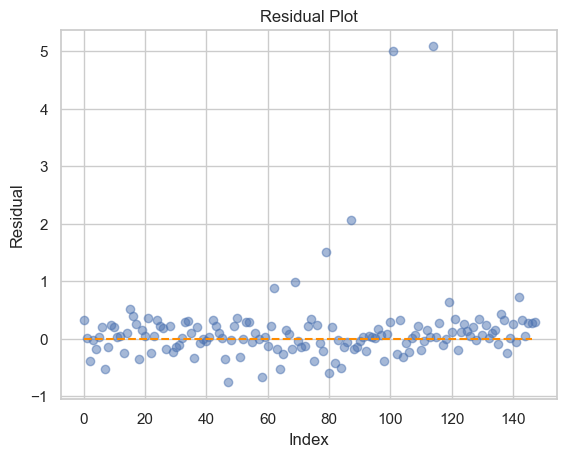

In [242]:
 # calling the function
homoscedasticity_assumption(mult_model_5, X_test5, y_test5)

### **Interpretation of the Residual Plot**
#### **Homoscedasticity Check: Residuals should be randomly scattered around zero, without any pattern.**
#### **Observation:**
Most residuals are tightly clustered around zero.
A few higher residual values indicate potential outliers but do not show a clear increasing/decreasing variance pattern.

#### **Conclusion:**
The model appears to satisfy the homoscedasticity assumption reasonably well.
Outliers may slightly impact prediction accuracy.

## **Error Normality curve**

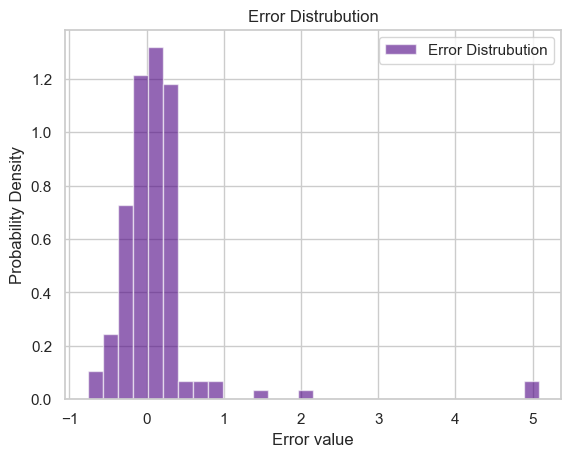

In [244]:
# Error Normality curve
df_results = calculate_residuals(mult_model_5, X_test5, y_test5)
plt.hist(df_results.Residual,bins=30,label="Error Distrubution",alpha=0.6,density=True,color="indigo")
plt.xlabel("Error value")
plt.ylabel("Probability Density")
plt.title("Error Distrubution")
plt.legend()
plt.grid(True)
plt.show()

### **Error Distribution Analysis**

This document analyzes the "Error Distribution" plot generated from a model's predictions. The plot is a histogram of the residuals (errors) and provides insights into the model's performance and potential areas for improvement.

**Key Observations:**

* **Shape:** The distribution resembles a normal distribution (bell curve) but exhibits a noticeable positive skew.
    * **Normal Distribution:** A perfectly normal distribution of errors indicates accurate predictions with deviations due to random chance.
    * **Positive Skew:** The extended tail on the right side signifies a higher frequency of larger positive errors, suggesting the model tends to underpredict (predict lower than actual values) more often.

* **Center:** The peak of the curve is slightly shifted to the right of zero, indicating a small positive bias.  This implies the model's errors are, on average, slightly positive.

* **Spread:** The spread of the curve reflects the variability of the errors. A wider spread indicates greater variability and potentially lower prediction accuracy.

**Interpretation and Implications:**

* **Model Assumptions:** The deviation from a perfect normal distribution suggests that the model's underlying assumptions might not be entirely valid. Potential reasons include:
    * Non-linearity in the data
    * Missing features
    * Outliers in the data
    * Inappropriate model selection

* **Model Evaluation:** While the distribution is somewhat close to normal, the skew and bias suggest potential for model improvement.

  
**Summary:**

The "Error Distribution" plot provides valuable information about the model's performance.  The observed positive skew and slight bias highlight areas where the model can be refined to improve accuracy and reliability.  Further investigation into the causes of the skew is crucial for effective model enhancement.

In [116]:
from mpl_toolkits.mplot3d import Axes3D

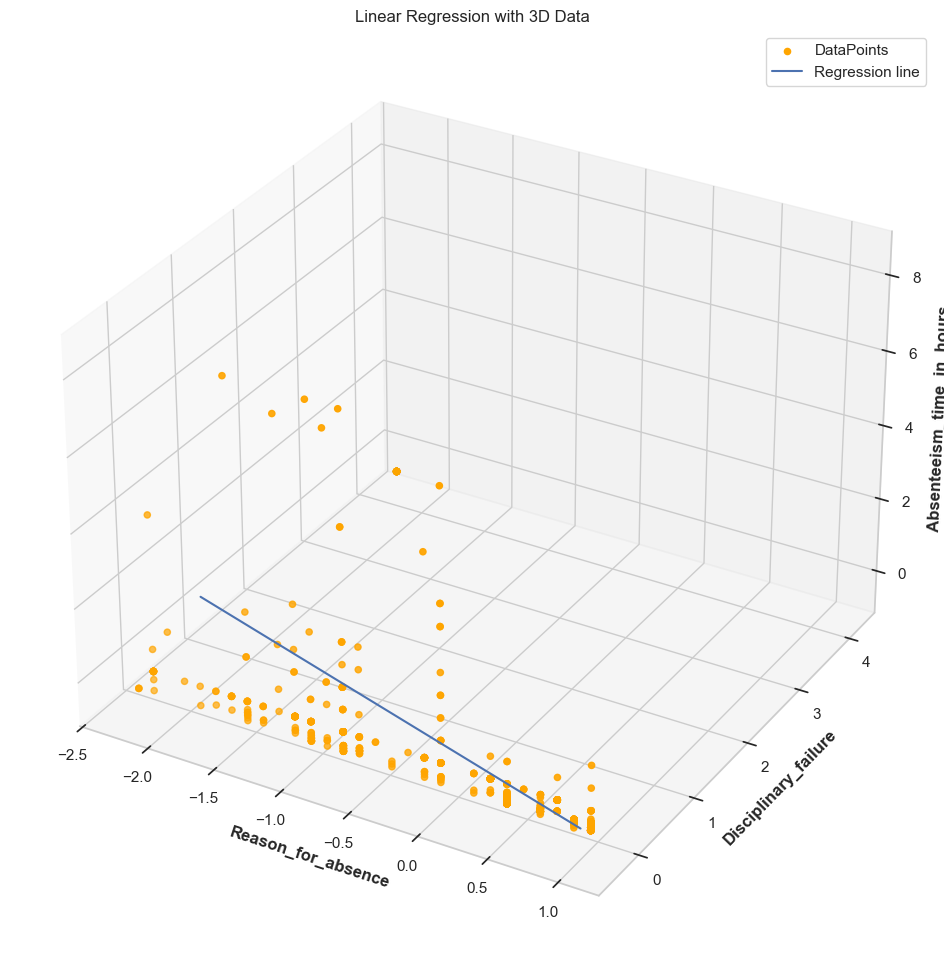

In [313]:
# Visualizing the data
X_2=df_scaled[['Reason_for_absence','Disciplinary_failure']].values.reshape(-1,2) 
Y=df_scaled["Absenteeism_time_in_hours"]
x = X_2[:,0] # this extracts the  1st column
y = X_2[:,1]
z = Y

# generating data for regression line
x1_line = np.arange(min(x),max(x),0.1) 
x2_line = np.array([mult_model_5.coef_[0]*val+(-mult_model_5.intercept_+mult_model_5.coef_[1]*np.mean(y))for val in x1_line]) 
y_line = mult_model_5.coef_[0]*x1_line + mult_model_5.coef_[1]*x2_line + mult_model_5.intercept_
                   

fig=plt.figure(figsize=(16,12))
ax= fig.add_subplot(111,projection='3d')
# Add x,y gridlines
#ax.grid(b=True,)

# Creating a plot
ax.scatter3D(x,y,z,label='DataPoints',c='orange')

# plot regresiion line
ax.plot(x1_line,x2_line,y_line,label='Regression line',c='b')

# set label and title
ax.set_xlabel("Reason_for_absence",fontweight='bold')
ax.set_ylabel("Disciplinary_failure",fontweight='bold')
ax.set_zlabel("Absenteeism_time_in_hours",fontweight='bold')
ax.set_title("Linear Regression with 3D Data")

# add legend
ax.legend()

plt.show()

### **3D Linear Regression Visualization**

This image depicts a 3D visualization of a linear regression model with 30 data points. Let's break down what we can observe and infer from this plot:

**Key Visual Elements:**

* **Data Points:** The yellow spheres represent the 30 individual data points used to train the model. Their spatial arrangement gives an idea of the underlying relationship between the three variables being considered.
* **Regression Plane:** The light blue plane represents the fitted linear regression model. It attempts to capture the best linear relationship between the variables in the 3D space. The plane's orientation and position are determined by the regression coefficients.for_absence and Disciplinary_failure) and the dependent variable (Absenteeism_time_in_hours). The ranges of values on each axis indicate the scales of measurement for each variable.

**Interpretation and Insights:**

* **Linear Relationship:** The plot aims to visualize a potential linear relationship between the predictor variables (Reason_for_absence and Disciplinary_failure) and the outcome variable (Absenteeism_time_in_hours). The regression plane represents this assumed linear relationship.
* **Model Fit:**  Visually assessing the fit, we can see that the plane doesn't perfectly capture all data points. This is expected, as linear regression aims to find the best fit, minimizing the overall error, but doesn't necessarily interpolate all points.
* **Influence of Variables:** The slope of the plane in relation to each axis provides insight into the influence of each independent variable on the dependent variable.  
    * A steeper slope indicates a stronger influence.  
    * The direction of the slope indicates the nature of the relationship (positive or negative).
* **Outliers:**  While not distinctly highlighted, some data points appear further away from the plane, potentially indicating outliers. These points might disproportionately influence the regression model and warrant further investigation.
* **Limitations of 2D Representation:**  It's important to remember that this 3D plot is still represented in a 2D image.  This can make it challenging to fully grasp the spatial relationships and assess the model's fit in certain areas. Interactivity in a 3D environment would provide a more complete understanding.

**Potential Further Analysis:**

* **Statistical Measures:**  Visual inspection alone is not sufficient for rigorous evaluation.  Statistical measures like R-squared, adjusted R-squared, and p-values for the coefficients are essential to quantify the goodness of fit and the significance of the relationships.
* **Residual Analysis:** Examining the residuals (the differences between actual and predicted values) can help identify patterns and potential issues with the model assumptions.
* **Model Refinement:** Based on the analysis, further steps might involve:
    * Feature engineering (e.g., creating interaction terms or transforming variables).
    * Addressing outliers.
    * Exploring non-linear models if the linear assumption is not appropriate.

**Summary:**

The 3D visualization offers a helpful way to understand the relationship between variables in a linear regression model. However, it should be complemented with statistical measures and further analysis to draw robust conclusions about the model's adequacy and predictive power. The visualization suggests a linear relationship is being modeled, but its accuracy and the influence of individual variables should be rigorously evaluated using appropriate statistical tools.

## **Detailed Interpretation of Model Performance and Residual Analysis**

### **1. Model Performance Summary**
- As the **number of features increases**, the model improves in predicting absenteeism time.
- **Key trends observed:**
  - **MSE and RMSE decrease**, indicating a reduction in error.
  - **R² score improves from 0.0037 to 0.1203**, meaning additional features explain more variance.
  - **Diminishing returns observed** after adding the second feature, suggesting feature selection is crucial.

---

### **2. Homoscedasticity Analysis (Actual vs. Predicted Plot)**
#### **Observations:**
- **Predicted values should align with the orange diagonal line (perfect prediction).**
- **Scattered points indicate variance**, showing the model does not predict all cases perfectly.
- **Outliers present**, suggesting that certain absenteeism cases deviate significantly.

#### **Implications:**
- **Underprediction and overprediction exist** for extreme cases.
- **Variance inconsistency (heteroscedasticity)** is present, meaning errors are not constant across predictions.
- **Possible need for transformation** (e.g., log transformation on absenteeism hours) to normalize predictions.

---

### **3. Residual Analysis (Residual Plot)**
#### **Key Insights from the Residual Plot:**
- **Residuals should ideally be randomly distributed around zero** → The plot shows some structure.
- **Some points significantly above zero**, indicating cases where the model highly underestimates absenteeism.
- **Clusters of residuals around zero but with varying spread**, suggesting heteroscedasticity.

#### **Implications for Model Performance:**
- **Outliers affect predictions** → Extreme cases of absenteeism need special handling.
- **Variance is not constant** → Indicates heteroscedasticity, violating regression assumptions.
- **Possibility of non-linearity** → A simple linear model may not fully capture the trends.

---

### **4. Final Conclusion & Recommendations**
 **Model Strengths:**
- **Multiple features help improve prediction accuracy.**
- **Most residuals are centered around zero**, suggesting the model captures some key absenteeism trends.

 **Limitations & Areas for Improvement:**
- **Presence of heteroscedasticity** → Consider **log transformation or weighted regression**.
- **Model struggles with extreme absenteeism cases** → Implement **outlier detection and separate treatment**.
- **Potential need for non-linear modeling** → Explore **polynomial regression, decision trees, or ensemble methods**.

 **Next Steps for Model Optimization:**
1. **Feature Engineering:** Introduce interaction terms between key features.
2. **Apply log transformation** to stabilize variance in absenteeism predictions.
3. **Use non-linear models** (Random Forest, XGBoost) to capture complex relationships.
4. **Conduct Variance Inflation Factor (VIF) test** to ensure predictors are not highly correlated.

---

### **Final Thought:**  
While the model provides valuable insights into absenteeism prediction, refining residual patterns and addressing heteroscedasticity will **enhance model accuracy and robustness**, leading to **more reliable absenteeism forecasts.**

